In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv("sms.csv",usecols=[0,1])
data

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.isnull().sum()

Label      0
Message    0
dtype: int64

In [16]:
data.duplicated().sum()

np.int64(403)

In [21]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)
data.duplicated().sum()

np.int64(0)

In [19]:
data.shape

(5169, 2)

In [20]:
data["Label"].value_counts(normalize=True)*100

Label
ham     87.366996
spam    12.633004
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x1ff385daef0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37%'),
  Text(0.553363565906573, -0.231924047755212, '12.63%')])

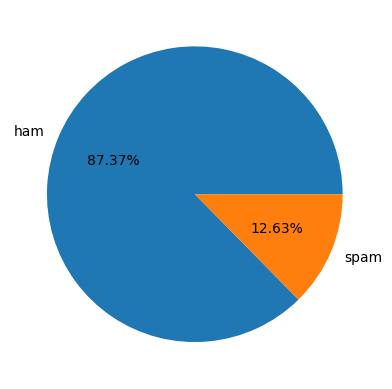

In [26]:
plt.pie(data["Label"].value_counts()*100,labels=["ham","spam"],autopct="%1.2f%%")

In [7]:
import numpy as np
a=np.array([1,2,3.4,4,34])
b=np.array([1,2,3,4,5])

import pandas as pd
df =pd.DataFrame({a,b})
df

TypeError: unhashable type: 'numpy.ndarray'